***
#### About this document
This is the assignment for the UCL CASA module Data Science for Spatial Systems (CASA0006) 
<br>
**Code is hosted [here](https://github.com/HumphreyHZ/CASA0006.git)**<br>
**Data is availble [here](https://github.com/HumphreyHZ/CASA0006.git)**
***

# Which Factor Has a Greater Impact on Smart City Index?

## 1.Introduction

According to the United Nations (2019), most people now live in urban areas rather than rural ones. In 1950, only 30% of the global population resided in cities, but by 2018, this figure had climbed to 55%. This ongoing shift from rural to urban living is expected to continue for the next several decades. Large and intricate urban gatherings of people tend to become chaotic and disorganized. Cities and megacities pose new problems, including waste management, public health issues, and traffic congestion (Chourabi et al., 2012). 

Cities are under pressure to manage rapid population growth while maintaining a high quality of life for their residents. Therefore, the importance of smart cities has become increasingly apparent. This paper uses OLS regression (multiple linear regression), Random Forest and XGBoot to reveal which factor has greater impact on smart city index. These three models show that ‘living’ is the most important factor.

## 2.Literature Review

ITU (2022) defines a smart city as:

“an innovative city that uses information and communication technologies (ICTs) and other means to improve quality of life, efficiency of urban operation and services, and competitiveness, while ensuring that it meets the needs of present and future generations with respect to economic, social, environmental as well as cultural aspects”.

With all these smart city developments happening, Smart City Assessment (SCA) “is a nascent field with much potential for future development” (Sharifi, 2019). The limited research analyzing SCA tools can be attributed to the fact that SCA is a relatively new field of research and practice (Sharifi, 2019)there's no a universally recognized smart city index or ranking created by international organisations (Toh, 2022). However, several institutions—including universities and private consulting firms—have released smart city indices claiming to successfully evaluate and compare cities based on their smart city performance (Bosch et al., 2016; Fernandez-Anez et al., 2020). Many smart city assessment tools assert that they enhance city competitiveness through benchmarking, but each tool defines the concept of a smart city differently (Patrão, Moura, and Almeida, 2020). Overall, smart cities generally involve six major dimensions: digital technology, economy, transportation, environment, people, quality of life, and governance (Lai and Cole, 2023). . 


## 3.Methodology

**OLS** is a linear regression technique that establishes a linear relationship between the independent variables (factors) and a dependent variable (the smart city index). It can be used to estimate the coefficients of the independent variables, providing insights into their significance and influence on the target variable(Ludbrook, 2010). The magnitude and sign of the coefficients indicate the impact of each factor.

**Random** Forest is a supervised learning method that builds multiple decision trees and combines them to improve prediction accuracy. It is useful for feature importance analysis, allowing you to determine which factors have the most significant impact on the smart city index (Genuer, Poggi and Tuleau-Malot, 2010).

**XGBoost** (Extreme Gradient Boosting) is a gradient boosting technique known for its high accuracy and efficiency. As a supervised learning method, XGBoost can identify feature importance and accommodate nonlinear relationships and interactions (Chen and Guestrin, 2016; Martins, 2023). It can help us understand which factors most influence the smart city index and how they contribute to the overall prediction.


In [1]:
#warnings off
import warnings
warnings.filterwarnings('ignore')

In [2]:
#This tells python to draw the graphs "inline" - in the notebook
%matplotlib inline  
import matplotlib.pyplot as plt
import statsmodels.api as sm
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
import statistics 
import seaborn as sns
from IPython.display import display, Math, Latex, display_latex
import plotly.express as px
import pylab
import pandas as pd
import numpy as np
# make the plots (graphs) a little wider by default
pylab.rcParams['figure.figsize'] = (10., 8.)
sns.set(font_scale=1.5)
sns.set_style("white")


## 4.Data Loading and Exploration

The dataset and variable explaination originally come from [here](https://www.kaggle.com/datasets/magdamonteiro/smart-cities-index-datasets)

In [3]:
#read the local csv file as 
smartcity_index = pd.read_csv('Smart_City_index.csv')
smartcity_index.head(20)

,Id,City,Country,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,SmartCity_Index
0,1,Oslo,Norway,6480,6512,7516,4565,8618,9090,7138
1,2,Bergen,Norway,7097,6876,7350,4905,8050,9090,7296
2,3,Amsterdam,Netherlands,7540,5558,8528,8095,7098,7280,7311
3,4,Copenhagen,Denmark,7490,7920,8726,5580,5780,7200,7171
4,5,Stockholm,Sweden,6122,7692,8354,4330,6743,7730,6812
5,6,Montreal,Canada,7490,4848,6624,6180,8465,9920,7353
6,7,Vienna,Austria,5683,7608,6232,5415,8580,7500,6771
7,8,Odense,Denmark,6160,8404,7578,5200,6955,7200,6886
8,9,Singapore,Singapore,5790,4344,5560,5535,9695,10000,6813
9,10,Boston,United States,7870,5224,6020,8935,6573,6220,6852


### **variable explanation**
**Smart_Mobility**: 
Index calculated from assessment of city-wide Public Transportation System, ICT, accessibility infrastructure.

**Smart_Environment**: 
Index calculated from environmental sustainability impact, monitoring pollution and energy management.

**Smart_Government**: Index calculated from comparative study of transparent governance & open data initiatives of smart cities across the world. Also, citizen 
participation in decision making has been included.

**Smart_Economy**: Index calculated through global comparison of city-wide productivity, economic vitality, and support for entrepreneurship and innovation.

**Smart_People**: Index calculated by comparing social and cultural plurality, education systems and its supporting ancillary facilities across the world.

**Smart_Living**: Index calculated by measuring metric around healthcare services, social security and housing quality.

**SmartCity_Index**: Aggregate score for smart city model based on smart city supergroups.et.

In [4]:
smartcity_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Id                 102 non-null    int64 
 1   City               102 non-null    object
 2   Country            102 non-null    object
 3   Smart_Mobility     102 non-null    int64 
 4   Smart_Environment  102 non-null    int64 
 5   Smart_Government   102 non-null    int64 
 6   Smart_Economy      102 non-null    int64 
 7   Smart_People       102 non-null    int64 
 8   Smart_Living       102 non-null    int64 
 9   SmartCity_Index    102 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 8.1+ KB


In [5]:
original_column_names = smartcity_index.columns
print(original_column_names)


Index(['Id', 'City', 'Country', 'Smart_Mobility', 'Smart_Environment',
       'Smart_Government', 'Smart_Economy', 'Smart_People', 'Smart_Living',
       'SmartCity_Index'],
      dtype='object')


In [6]:
#rename columns
sci = smartcity_index.rename(columns={
    'Smart_Mobility': 'mobility',
    'Smart_Environment': 'environment',
    'Smart_Government': 'government',
    'Smart_Economy': 'economy',
    'Smart_People': 'people',
    'Smart_Living': 'living',
    'SmartCity_Index': 'index',
})
sci.head(20)

,Id,City,Country,mobility,environment,government,economy,people,living,index
0,1,Oslo,Norway,6480,6512,7516,4565,8618,9090,7138
1,2,Bergen,Norway,7097,6876,7350,4905,8050,9090,7296
2,3,Amsterdam,Netherlands,7540,5558,8528,8095,7098,7280,7311
3,4,Copenhagen,Denmark,7490,7920,8726,5580,5780,7200,7171
4,5,Stockholm,Sweden,6122,7692,8354,4330,6743,7730,6812
5,6,Montreal,Canada,7490,4848,6624,6180,8465,9920,7353
6,7,Vienna,Austria,5683,7608,6232,5415,8580,7500,6771
7,8,Odense,Denmark,6160,8404,7578,5200,6955,7200,6886
8,9,Singapore,Singapore,5790,4344,5560,5535,9695,10000,6813
9,10,Boston,United States,7870,5224,6020,8935,6573,6220,6852


In [7]:
sci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           102 non-null    int64 
 1   City         102 non-null    object
 2   Country      102 non-null    object
 3   mobility     102 non-null    int64 
 4   environment  102 non-null    int64 
 5   government   102 non-null    int64 
 6   economy      102 non-null    int64 
 7   people       102 non-null    int64 
 8   living       102 non-null    int64 
 9   index        102 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 8.1+ KB


In [8]:
#Summary Statistics
summary = sci.describe().round(2)
summary=summary.T
summary

,count,mean,std,min,25%,50%,75%,max
Id,102.0,51.50,29.59,1.0,26.25,51.5,76.75,102.0
mobility,102.0,5786.11,1202.63,3175.0,4864.75,5724.0,6763.75,8110.0
environment,102.0,5935.93,1722.71,1850.0,4530.50,6491.0,7310.00,8844.0
government,102.0,5916.58,1175.27,2806.0,5143.00,5932.0,6585.00,8726.0
economy,102.0,6114.28,1790.14,1490.0,5007.50,6391.5,7463.75,9225.0
people,102.0,5896.81,1475.25,2825.0,4724.75,5747.5,7072.50,9695.0
living,102.0,6354.86,2274.48,1980.0,4385.00,6334.0,8696.75,10000.0
index,102.0,5928.46,1038.96,-24.0,5344.75,6248.0,6672.50,7353.0


In [9]:
num_cities_by_country = sci.groupby('Country')['City'].count().sort_values(ascending=False)
num_cities_by_country


Country
Italy                   11
Finland                 10
Germany                 10
United States            7
France                   7
Canada                   6
Norway                   4
Australia                4
Denmark                  4
United Kingdom           3
Sweden                   3
China                    3
Russia                   2
United Arab Emirates     2
Switzerland              2
Japan                    2
Spain                    2
South Korea              2
Estonia                  1
Taiwan                   1
Slovenia                 1
Slovakia                 1
Singapore                1
Belgium                  1
Portugal                 1
New Zealand              1
Netherlands              1
Malaysia                 1
Austria                  1
Latvia                   1
Israel                   1
Ireland                  1
Iceland                  1
Hungary                  1
Czech Republic           1
Luxembourg               1
Name: City, dtype: i

In [10]:
def getTop10Cities(category, returnData=False):
    # Ensure the category is numeric
    if sci[category].dtype not in ['int64', 'float64']:
        raise ValueError(f"The column '{category}' must be numeric.")

    plt.figure(figsize=(7, 7))
    top10 = sci[['City', category]].sort_values(by=category, ascending=False).head(10)
    sns.barplot(data=top10, y='City', x=category)  # Ensure x is numeric
    plt.title(f'Top 10 cities in {category}')
    plt.show()

    if returnData:
        return top10


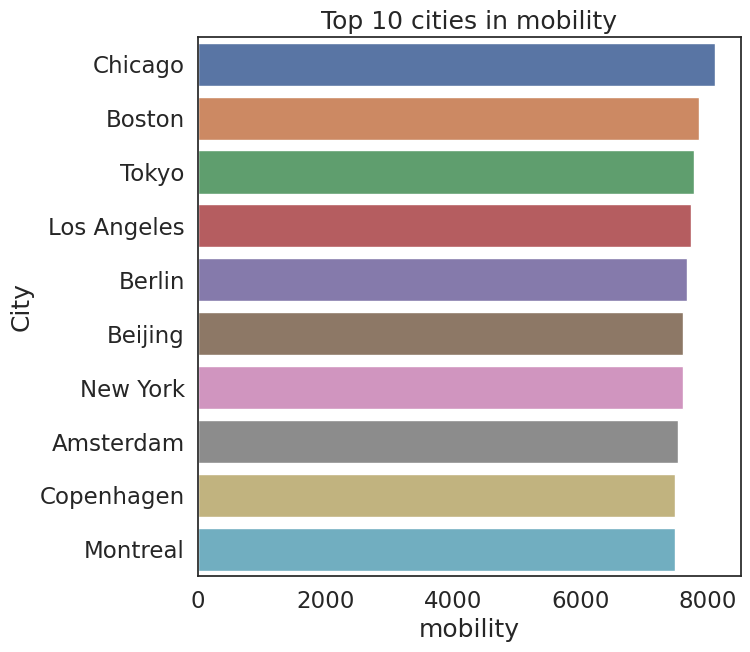

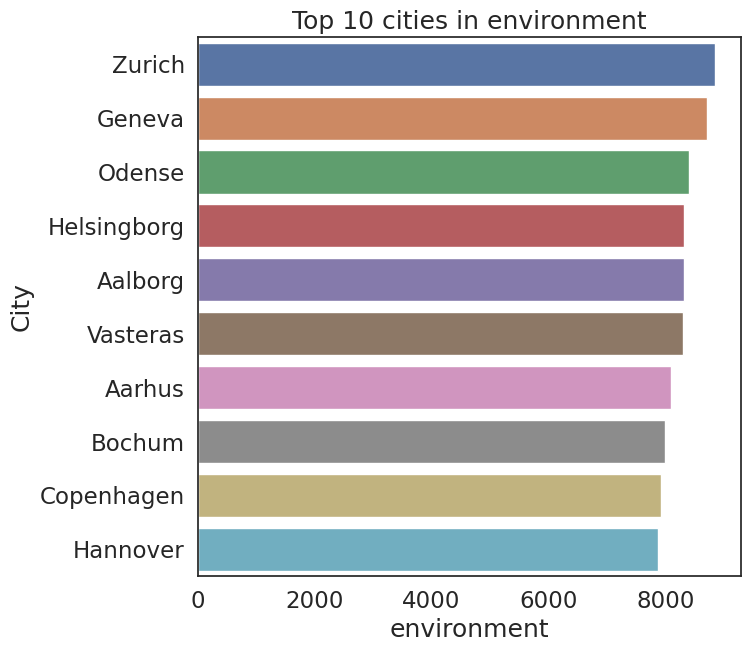

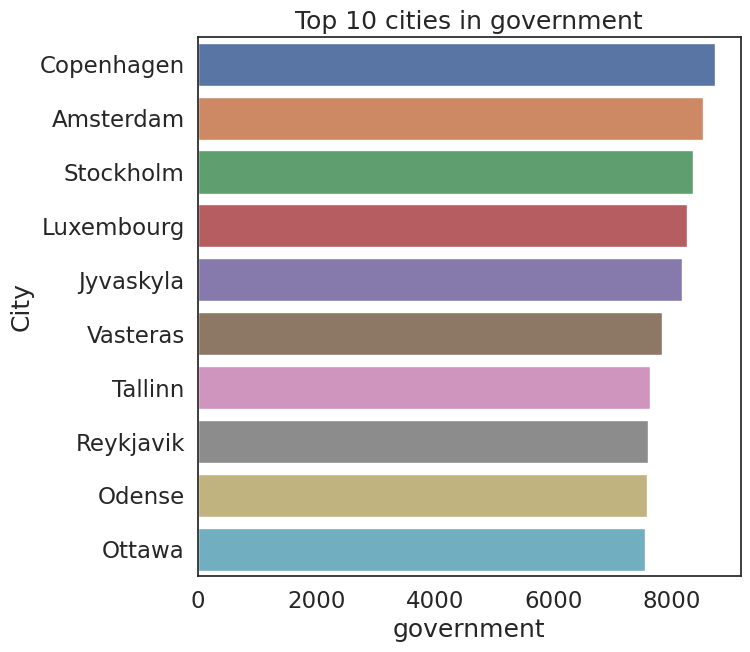

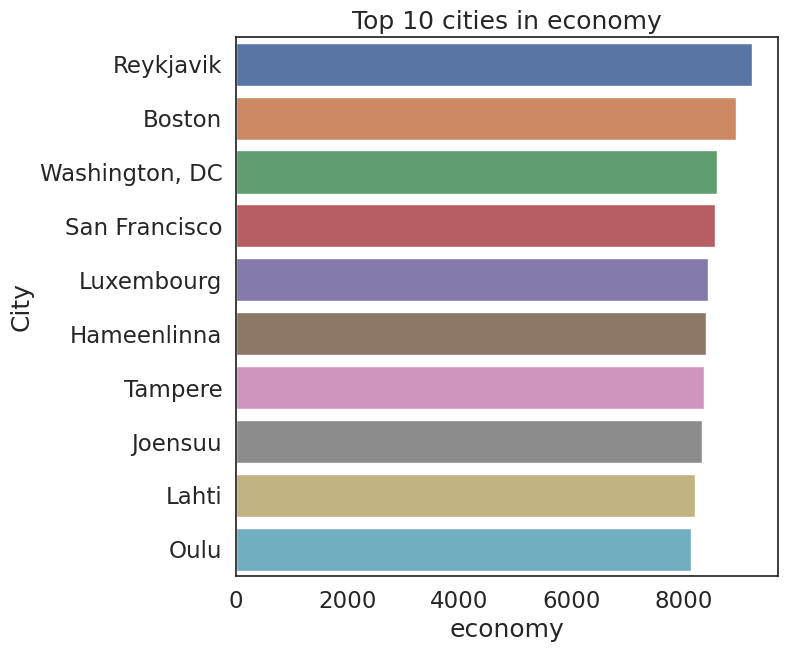

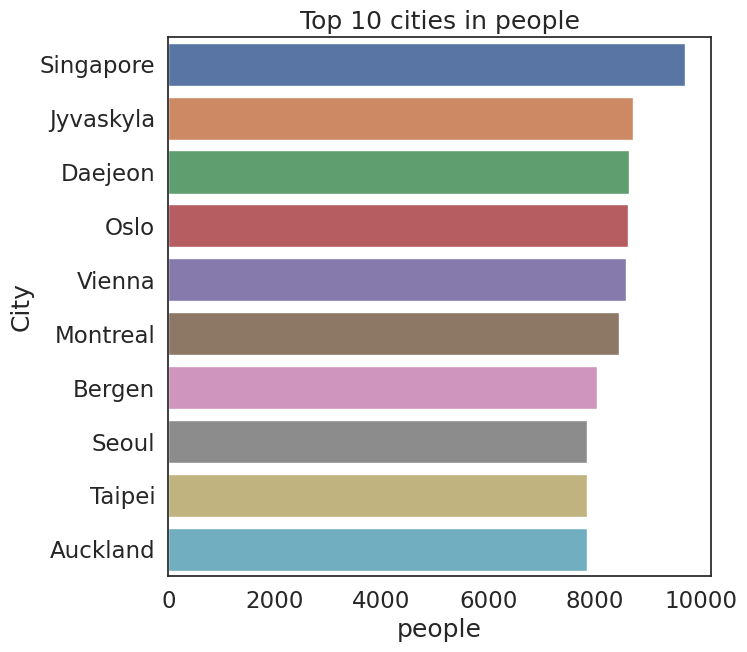

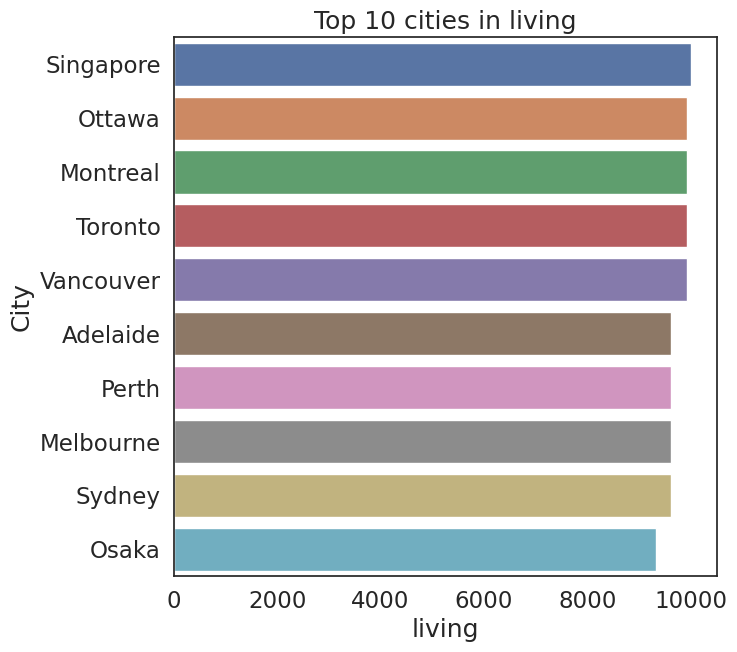

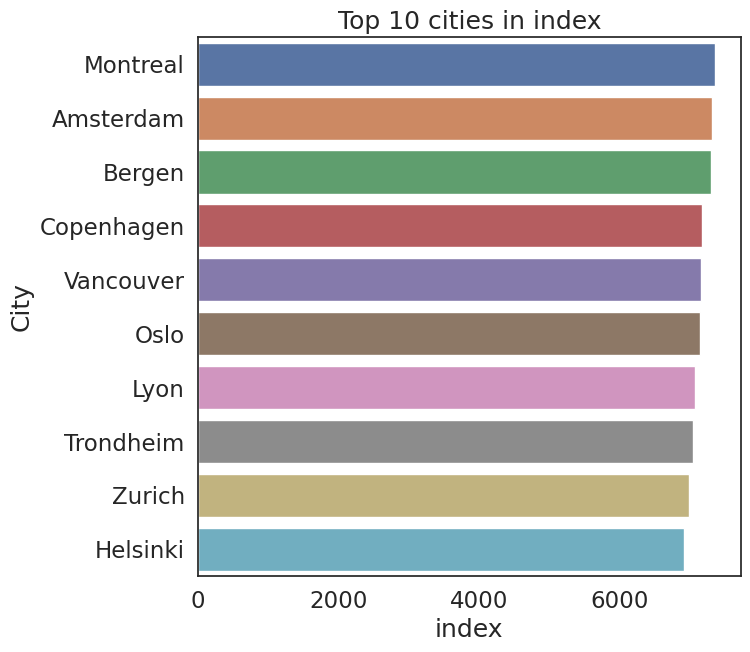

In [11]:
for col in sci.columns[3:]:  # Assuming first 2 columns are non-numeric
    getTop10Cities(col)
    print('\n')

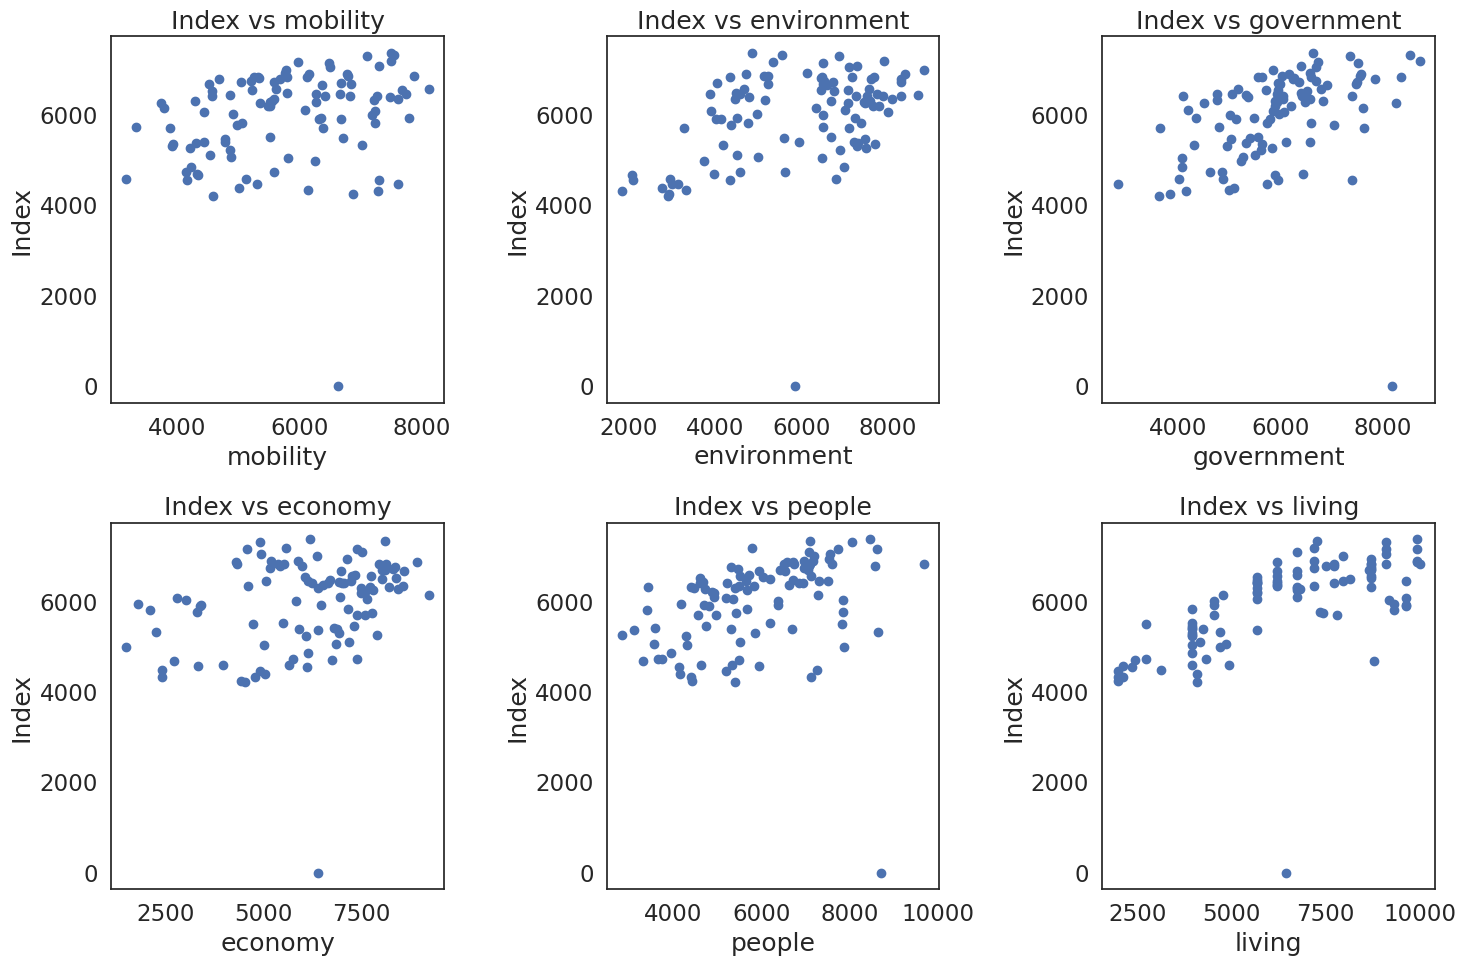

In [12]:
# Selecting the features to plot against the 'index'
features = ['mobility', 'environment', 'government', 'economy', 'people', 'living']

# Creating a figure with 2 rows and 3 columns for the subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))  # Adjust the figure size as needed

# Flatten the array of axes to easily iterate over it
axs = axs.ravel()

# Plotting each feature against the 'index'
for i, feature in enumerate(features):
    axs[i].scatter(sci[feature], sci['index'])
    axs[i].set_title(f'Index vs {feature}')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Index')

# Adjusting layout to prevent overlapping of plots
plt.tight_layout()
plt.show()

## 5. Linear regression

### Assumptions 
Plotting scatter plots between each of the independent variables and the dependent variable can give us a visual indication of linearity. The points roughly follow a straight line, so this suggests a linear relationship.

However, before conducting linear regression, it's crucial to ensure several conditions are met—statistical analyses come with certain assumptions that must be fulfilled to produce reliable outcomes. In the case of regression, there are four primary assumptions that need to be validated. There are three main ones:

    A. Indepdendence 
    B. Homoscedasticity
    C. Multicollinearity

### A. Independence 

**`Linear regression assumes that measurements for each individual sample are completely independent of and not influenced by the measurements of other samples..`**


Smart City Index data can be considered independent if each data point (typically representing a city or region) does not influence or affect the other data points in the dataset. 

### B. Homoscedasticity 

**`Linear regression assumes that the variance of residuals is the same for any value of x, and that residuals are normally distributed with a mean of 0.`**

Residual vs Fitted Plot is used to check homoscedasticity 

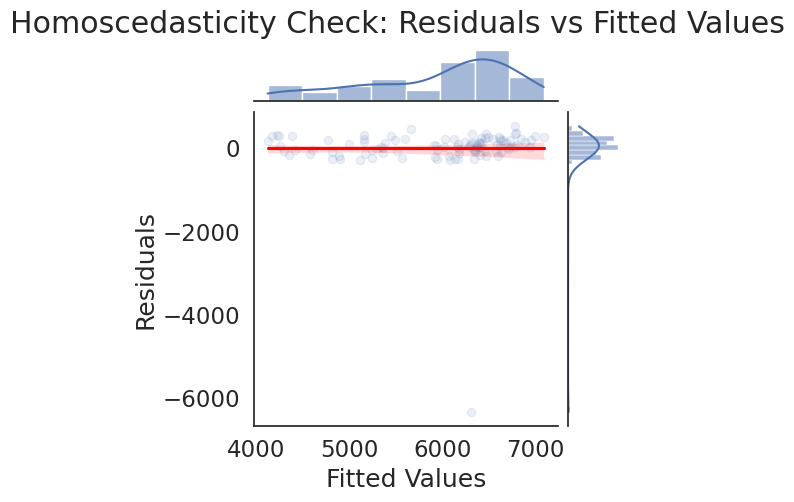

In [13]:
# Assuming 'df' is your DataFrame with the original data
import statsmodels.api as sm
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
# Define the regression model
model = ols('index ~ mobility + environment + economy + people + living', data=sci).fit()

# Compute fitted values and residuals
sci['fitted_values'] = model.fittedvalues
sci['residuals'] = model.resid

# Now create the jointplot
sns.jointplot(data=sci, 
               x='fitted_values',  # Fitted values from the regression model
               y='residuals',      # Residuals from the regression model
               kind="reg",         # Regression and scatterplot
               scatter_kws={'alpha': 0.1},  # Transparency of the scatterplot points
               line_kws={'color': 'red'},   # Color of the regression line
               height=5)          # Height of the plot in inches

plt.xlabel('Fitted Values')  # Label for the x-axis
plt.ylabel('Residuals')      # Label for the y-axis
plt.suptitle('Homoscedasticity Check: Residuals vs Fitted Values', y=1.02)  # Title for the plot, adjusted position
plt.show()

## Interpretation

Residuals vs. Fitted Values: The main scatter plot shows the residuals on the y-axis against the fitted values on the x-axis. Homoscedasticity would be indicated by the residuals being evenly spread across all levels of fitted values, without any clear patterns. If the residuals seem randomly dispersed and form a "cloud" around the horizontal axis (y=0), this suggests homoscedasticity.

Red Regression Line: The red line represents a simple regression line of residuals on the fitted values. For perfect homoscedasticity't this li is expected to be flat and close to zero across the range of fitted values. In the provided plot, the line appears relatively flat, which is a good sign; however, the true test of homoscedasticity is more about the spread of the residuals rather than the slope of this line.

Density Plots: On the top and right margins, we have density plots for the fitted values and residuals, respectively. These plots show the distributiontheyour fitted values and residuals. In this case, the density plot of the residuals (right side) should ideally look symmetric around zero and have a constant spread across the levels of fitted values.

Interpretation: In the provided plot, the spread of residuals does not appear to be fanning out or forming a funnel shape as the fitted values increase, which would suggest that the data may be homoscedastic. However, it's important to note that while the plot shows no clear signs of heteroscedasticity, there is a noticeable gap in the fitted values around 5000 and 6000, where fewer data points exist. It's also worth noting that this type of plot does not give a definitive test for homoscedasticity—it provides a visual assessment, which should be supplemented with statistical tests such as the Breusch-Pagan test for a more conclusive analysis.

# Breusch-Pagan test
The Breusch-Pagan test is a statistical test used to detect heteroscedasticity in a regression model (Breusch and Pagan, 1979). Given that the plot alone cannot confirm homoscedasticity, I should conduct additional tests and consider looking.


In [14]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Fit the model
model = ols('index ~ mobility + environment + government + economy + people + living', data=sci).fit()

# Calculate residuals
residuals = model.resid

# Get predicted values
predictions = model.fittedvalues

# Perform the Breusch-Pagan test
bp_test = het_breuschpagan(residuals, model.model.exog)

labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))


{'Lagrange multiplier statistic': 8.243085720992264, 'p-value': 0.2208297264791172, 'f-value': 1.392062920579004, 'f p-value': 0.22579943807461383}


The p-value is approximately 0.228. Since this p-value is greater than 0.05, we do not have enough evidence to reject the null hypothesis that the variance of the errors is constant. Therefore, we would conclude that there is no significant evidence of heteroscedasticity, and the assumption of homoscedasticity stands based on this test.


### C. Multicollinearity 
**`Multicollinearity refers to linear relationship between two or more independent variables.`** Multicollinearity can inflates the standard errors of the regression coefficients, making them less statistically significant. This can lead to incorrect conclusions about the importance of predictors (Alin, 2010). To have a better OLS regression, it is necessary to detect multicollinearity.

A correlation matrix is a visual tool that can be used to explore the presence of multicollinearity:

Text(0.5, 1.0, 'Correlation Matrix')

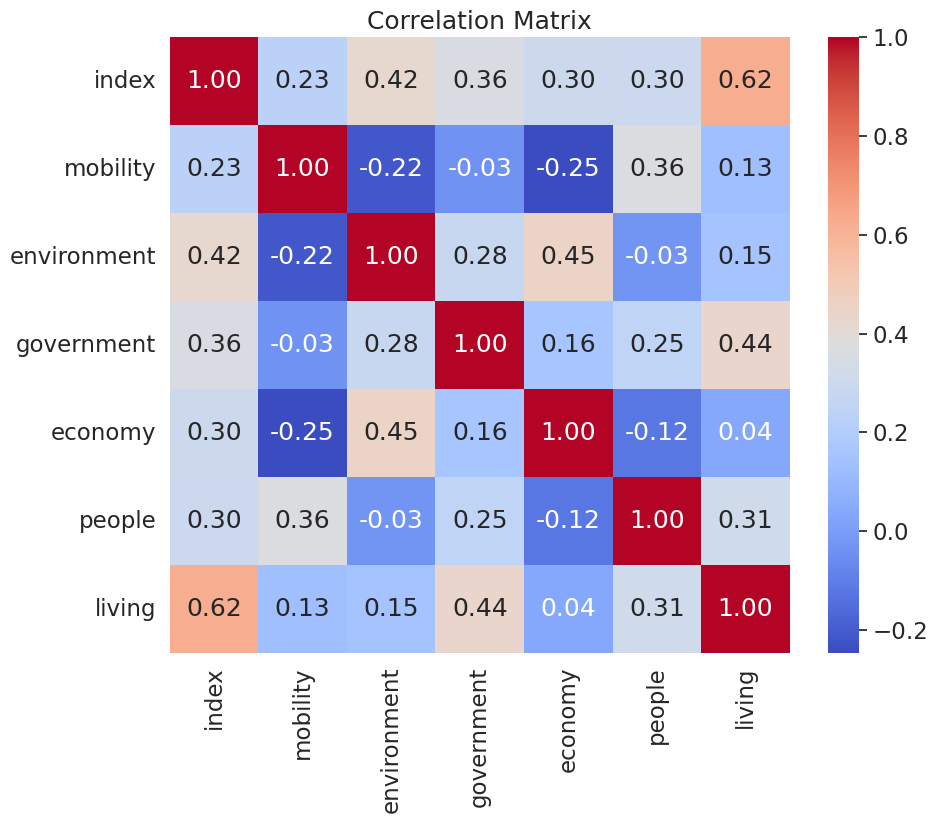

In [15]:
# Select only the columns of interest for the correlation matrix
cols_of_interest = ['index', 'mobility', 'environment', 'government', 'economy', 'people', 'living']
sci_selected = sci[cols_of_interest]


sns.heatmap(sci_selected.corr(numeric_only=True), # plot a correlation matrix 
            annot=True, # show the correlation values on the plot
            fmt=".2f", # set the format of the correlation values to be two decimal places
            cmap='coolwarm') # set the color palette to be coolwarm (blue for negative correlations, red for positive correlations)

plt.title('Correlation Matrix') # add a title

The variable living is most strongly correlated with the index, which might suggest it has the most substantial impact on the index.
The variables mobility, environment, and economy also show positive correlations with the index, but to a lesser extent.
No variables have a strong negative correlation with the index.
Some variables show weak to moderate correlations with each other, such as economy and environment (0.45). This indicates a moderate positive relationship, but not so high as to be particularly concerning for multicollinearity in a regression model.
The correlation matrix helps in understanding the inter-relationships among the variables and is also useful for detecting multicollinearity before performing regression analysis. Her, hat correlation does not imply causation.

In [16]:
# calculating VIF
# This function is amended from: https://stackoverflow.com/a/51329496/4667568

from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, list_var_not_to_remove=None, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param list_var_not_to_remove: the list of variables that should not be removed even though it has a high VIF. For example, dummy (or indicator) variables represent a categorical variable with three or more categories.
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const as const should not be removed
        vif_df = vif_df.drop('const')
        
        # drop the variables that should not be removed
        if list_var_not_to_remove is not None:
            vif_df = vif_df.drop(list_var_not_to_remove)
            
        print('Max VIF:', vif_df.VIF.max())
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [17]:
ind_vars= ['mobility', 'environment', 'government', 'economy', 'people', 'living']

vif = drop_column_using_vif_(sci[ind_vars], thresh=5)
print("The columns remaining after VIF selection are:")
print(vif.columns)

Max VIF: 1.3684423158763055
The columns remaining after VIF selection are:
Index(['mobility', 'environment', 'government', 'economy', 'people', 'living'], dtype='object')


 The maximum VIF value among the independent variables is 1.32, which is well below the common threshold values of 5 or 10 that are typically used as a cutoff to indicate problematic multicollinearity.

Since all of the VIF values are below the threshold, the function has determined that there is no need to drop any columns to mitigate multicollinearity. Therefore, all the independent variables ('mobility', 'environment', 'economy', 'people', and 'living') remain in the model.

## Regression

In [18]:
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col

model= ols('index ~ mobility + environment + government + economy + people + living', data=sci).fit() # fit the model
print(model.summary()) # print the summary

                            OLS Regression Results                            
Dep. Variable:                  index   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     23.42
Date:                Mon, 22 Apr 2024   Prob (F-statistic):           8.18e-17
Time:                        15:40:01   Log-Likelihood:                -806.41
No. Observations:                 102   AIC:                             1627.
Df Residuals:                      95   BIC:                             1645.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     967.4807    576.562      1.678      

The OLS regression summary provides a wealth of information about the regression model:

**1.Model Fit:**

R-squared: At 0.597, this indicates that around 59.7% of the variability in the dependent variable (index) can be explained by the model.
Adj. R-squared: Adjusted for the number of predictors, it is 0.571, suggesting that after accounting for the number of variables in the model, around 57.1% of the variability is explained.

**2.Model Significance:**

F-statistic: At 23.42, it tests the null hypothesis that all regression coefficients are equal to zero. A large F-statistic suggests at least some predictors are related to the response.
Prob (F-statistic): The p-value for the F-statistic is extremely small (8.18e-17), indicating strong evidence against the null hypothesis. It suggests the model is statistically significant.

**3.Coefficients:**

Each coefficent represents the change in the dependent variable for a one-unit change in the predictor, assuming all other predictors are held constant.
Intercept: The expected value of index when all predictors are zero. Its p-value is 0.097, which is marginally above the typical alpha level of 0.05, suggesting that it is not statistically significant.

**mobility**, **environment**, and **living** have p-values less than 0.05, indicating they are statistically significant predictors of index.
government, economy, and people have p-values greater than 0.05, suggesting they are not statistically significant predictors of index at the 5% significance level.
**living** has a greater impact on smart city index.

**4.Diagnostic for Residuals:**

Durbin-Watson: Close to 2, suggesting that there is no strong evidence of autocorrelation in the residuals.
Prob(JB): The Jarque-Bera test p-value is 0.00, which indicates that the residuals do not follow a normal distribution.

**5.Condition Number:** The condition number is large (1.27e+05), which suggests potential multicollinearity issues or numerical problems. However, the condition number can be sensitive to scaling, so it is not always indicative of a problem. The VIF calculated earlier did not suggest multicollinearity, so it may not be a concern.

Based on these results:

The model fits the data reasonably well.
There are statistically significant predictors in the model.
There is no strong autocorrelation in the residuals, but they do not appear to be normally distributed.
The issue of multicollinearity might not be significant, given the VIF results, but the high condition number warrants further investigation.
Given the non-normality of residuals, further investigation might be needed. This could involve checking for outliers, leveraging transformations, or considering a different modeling approach if the assumptions of OLS are not sufficiently met.

## 6.Random Forest

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
# random forest
from sklearn.ensemble import RandomForestRegressor
# feature importance
import rfpimp

In [20]:
sci

,Id,City,Country,mobility,environment,government,economy,people,living,index,fitted_values,residuals
0,1,Oslo,Norway,6480,6512,7516,4565,8618,9090,7138,6783.889797,354.110203
1,2,Bergen,Norway,7097,6876,7350,4905,8050,9090,7296,6999.071726,296.928274
2,3,Amsterdam,Netherlands,7540,5558,8528,8095,7098,7280,7311,6779.445984,531.554016
3,4,Copenhagen,Denmark,7490,7920,8726,5580,5780,7200,7171,6795.747332,375.252668
4,5,Stockholm,Sweden,6122,7692,8354,4330,6743,7730,6812,6470.506787,341.493213
...,...,...,...,...,...,...,...,...,...,...,...,...
97,98,Riga,Latvia,4152,4584,4616,7380,3745,4330,4712,4883.614840,-171.614840
98,99,Beijing,China,7610,2998,2806,4905,5183,1980,4449,4577.671694,-128.671694
99,100,St Petersburg,Russia,4588,2908,3622,4515,5390,4100,4191,4349.057268,-158.057268
100,101,Calgary,Canada,6675,4052,5946,8022,6424,8657,6678,6585.965647,92.034353


In [21]:
# Dropping the non-numeric columns
sci_rf = sci.drop(['Id', 'City', 'Country', 'fitted_values', 'residuals'], axis=1)
sci_rf


,mobility,environment,government,economy,people,living,index
0,6480,6512,7516,4565,8618,9090,7138
1,7097,6876,7350,4905,8050,9090,7296
2,7540,5558,8528,8095,7098,7280,7311
3,7490,7920,8726,5580,5780,7200,7171
4,6122,7692,8354,4330,6743,7730,6812
...,...,...,...,...,...,...,...
97,4152,4584,4616,7380,3745,4330,4712
98,7610,2998,2806,4905,5183,1980,4449
99,4588,2908,3622,4515,5390,4100,4191
100,6675,4052,5946,8022,6424,8657,6678


In [22]:
# Define features and target variable
X = sci_rf.drop(columns=['index'])  # All features except 'index'
y = sci_rf['index']  # Target variable

In [23]:
# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

# Define hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200, 300],  # Number of trees in the forest
    'max_depth': [10, 20, 30, None],  # Maximum depth of each tree
    'min_samples_split': [2, 4, 6],   # Minimum samples required to split a node, but only integers >= 2
    'min_samples_leaf': [1, 2, 4],    # Minimum samples required at a leaf node
    'max_features': ['sqrt', 'log2', None]  # Features to consider when splitting
}

# Initialize Random Forest Regressor
rf = RandomForestRegressor(random_state=100)

# Use GridSearchCV to find optimal hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the model with the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("The best parameter value is:", best_params)
print("The best score is:", best_score)

The best parameter value is: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
The best score is: -727048.6047401966


In [24]:
# Initialize and train the Random Forest regressor with optimal hyperparameters
rf = RandomForestRegressor(
    n_estimators=50,
    max_depth=20,
    min_samples_leaf=2,
    min_samples_split=2,
    max_features='sqrt',
    random_state=100
)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)  # MSE of the predictions
r2 = r2_score(y_test, y_pred)  # R-squared of the predictions

# Get feature importances from the trained model
feature_importances = rf.feature_importances_

# Create a DataFrame to represent feature importances
feature_importances_df = pd.DataFrame(
    {'Feature': X_train.columns, 'Importance': feature_importances}
).sort_values(by='Importance', ascending=False)  # Sort by importance in descending order

# Display feature importances
print("Feature Importances:")
print(feature_importances_df)



Feature Importances:
       Feature  Importance
5       living    0.331407
1  environment    0.188466
4       people    0.178415
2   government    0.154539
3      economy    0.081997
0     mobility    0.065176


In [25]:
# Display Mean Squared Error and R-squared
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Display the predictions
print("Predictions on test data:")
print(y_pred)


Mean Squared Error: 95436.71
R-squared: 0.85
Predictions on test data:
[6676.73328571 4554.75266667 5737.64580952 5486.25633333 6637.85904762
 6169.53528571 6701.68061905 6029.21980952 5402.01033333 6609.944
 5307.981      5944.03166667 5490.40609524 4951.27833333 5510.70447619
 5203.43280952 5786.32336508 6468.99933333 6313.57947619 6898.72809524
 6160.77083333 5484.19633333 5502.28266667 6257.4992381  6430.51055556
 6375.995     ]


In [26]:
# Find the indices of the test set in the original DataFrame
test_indices = X_test.index

# Get the corresponding cities
corresponding_cities = sci.loc[test_indices, 'City']

# Display the cities and their corresponding predicted Smart City index
predictions_with_cities = pd.DataFrame({
    'City': corresponding_cities,
    'Predicted_Smart_City_Index': y_pred  # Assuming y_pred contains the predicted values
})

print(predictions_with_cities)


             City  Predicted_Smart_City_Index
37          Paris                 6676.733286
86      Hong Kong                 4554.752667
26      Reykjavik                 5737.645810
93   Kuala Lampur                 5486.256333
35          Turku                 6637.859048
25      Duseldorf                 6169.535286
36          Espoo                 6701.680619
33     Luxembourg                 6029.219810
78       Florence                 5402.010333
21        Toronto                 6609.944000
75        Catania                 5307.981000
51       Adelaide                 5944.031667
64       Brussels                 5490.406095
91           Rome                 4951.278333
88         Ancona                 5510.704476
97           Riga                 5203.432810
73        Tallinn                 5786.323365
5        Montreal                 6468.999333
41         Sydney                 6313.579476
11      Trondheim                 6898.728095
29         Munich                 

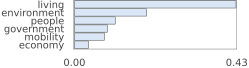

In [27]:
# Generate feature importances using the test data
rf_imp = rfpimp.importances(rf, X_test, y_test)

# Plot the feature importances
viz = rfpimp.plot_importances(rf_imp)

# Display the plot inline
viz

## 7.XGBoost 

In [28]:
import xgboost as xgb
from xgboost import XGBRegressor

# check the library version before we start
print("xgboost version:{}".format(xgb.__version__))

xgboost version:2.0.1


In [29]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=125)


# Define hyperparameter grid for GridSearchCV
hyperparameters = {'max_depth': [10, 20, 30, 40, 50], 'n_estimators': [50, 100, 150, 200, 250]}

# Initialize RandomState for consistency
randomState_xgb = 125

# Correctly initialize the XGBoost Regressor with unique variable names
xgb_regressor = XGBRegressor(random_state=randomState_xgb)

# Perform GridSearchCV with default 5-fold cross-validation
gscv_xgb = GridSearchCV(xgb_regressor, hyperparameters, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV to find the best hyperparameters
gscv_xgb.fit(X_train, y_train)

# Get the best parameter values and best score
best_params = gscv_xgb.best_params_
best_score = gscv_xgb.best_score_

print("Best parameter values:", best_params)
print("Best score:", best_score)

# Train the final XGBoost model with the best hyperparameters
xgb_final = XGBRegressor(
    max_depth=best_params['max_depth'], 
    n_estimators=best_params['n_estimators'], 
    random_state=randomState_xgb
)
xgb_final.fit(X_train, y_train)

# Model evaluation
r2_train = xgb_final.score(X_train, y_train)  # R-squared on training data
r2_test = xgb_final.score(X_test, y_test)  # R-squared on testing data

print("R2 on the training data:", r2_train)
print("R2 on the testing data:", r2_test)

# Root Mean Squared Error (RMSE) on training and testing data
rmse_train = mean_squared_error(y_train, xgb_final.predict(X_train), squared=False)
rmse_test = mean_squared_error(y_test, xgb_final.predict(X_test), squared=False)

print("RMSE on the training data:", rmse_train)
print("RMSE on the testing data:", rmse_test)




Best parameter values: {'max_depth': 10, 'n_estimators': 100}
Best score: -109846.27072914997
R2 on the training data: 0.9999999999993556
R2 on the testing data: 0.06288649590845952
RMSE on the training data: 0.0006813874169183209
RMSE on the testing data: 1397.6494640696606


In [30]:
# Feature importance using rfpimp (permutation)
xgb_imp = rfpimp.importances(xgb_final, X_test, y_test)

# Display feature importances
print("Feature Importances:")
print(xgb_imp)


Feature Importances:
             Importance
Feature                
living         0.325124
mobility       0.020323
government     0.015105
economy       -0.000949
people        -0.039043
environment   -0.041151


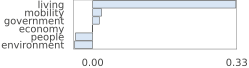

In [31]:
# Visualize feature importances
viz = rfpimp.plot_importances(xgb_imp)
viz  # Display the plot inline

### Comparing three models

In [32]:
# create a list of models
list_name_models = ['RF', 'XGBoost']
# use the models from above
list_reg_models = [rf, xgb_final]

dict_models = dict()

for name, model in zip(list_name_models, list_reg_models):
    dict_models[name] = [model.score(X_train, y_train), model.score(X_test, y_test), model.score(X_train, y_train) - model.score(X_test, y_test)]

# transform dict_models to dataframe
df_models = pd.DataFrame.from_dict(dict_models, orient='index', columns=['R2_train_data', 'R2_test_data', 'R2_diff'])
df_models
# you can then export df_models as a csv file and use it in MS Excel or Word
# df_models.to_csv(...)

,R2_train_data,R2_test_data,R2_diff
RF,0.936685,0.554532,0.382153
XGBoost,1.000000,0.062886,0.937114


Random Forest Results: 
features like 'living' and 'environment' show higher importance compared to others like 'government' and 'economy.' This suggests that variations in these features have a stronger relationship with the smart city index

XGBoost:
In this plot, 'living' and 'people' are relatively more important than 'government.' This indicates that these features may have a more significant impact on the index in this specific XGBoost model.


## 8.Discussion

The results from th (OS), Random Forest, and XGBoost models provide insights into which factors have the greatest impact on thsmart city indexe.


In the ion output, coefficients and p-values suggest that mobility, environment, economy, and living factors have significant relationships with the smart city index. Living and mobility seem to have the strongest influence, indicated by higher coefficients and lower p-values. These results imply that cities focusing on these factors tend to score higher on the smart city index. Both Random Forest and XGBoost indicate that 'living' is an important feature for predicting the smart city index. Random Forest seems to generalize better, given the lower R2_diff. While it does show some degree of overfitting, it appears to perform reasonably on the test data. XGBoost exhibits signs of overfitting, with a massive R2_diff and low R2_test_data. This suggests it may not be suitable for predicting new data or generalizing results. 


Overall, Random Forest might be more reliable in this context, given its more balanced performance across training and test datasetse.



## 9.Limitation

The dataset may not be comprehensive because many samples come from cities in Europe. The sample size is around 100, and could potentially incorporate more cities. These two factor leading to biases in the models' predictions. In addition, the data only cover 2019, so it is unlikely to have a comparative analysis on different years.


Overfitting: The R² scores from Random Forest and XGBoost suggest that the models might be overfitting the training data, resulting in lower performance on the test set. This could be due to hyperparameters or a limited amount of training data.

Methodological Constraints: Each model has inherent assumptions and limitations that can affect results. For instance, OLS assumes linearity, and Random Forest and XGBoost require careful tuning to avoid overfitting.
.





## 10.Conclusion


The analysis provides valuable insights into the factors influencing city index. The consistent significance of the living factor across all models highlights its crucial role in determining a city's smartness. Additionally, environment and mobility emerged as key contributors, suggesting that improving these aspects could enhance a city's overall smart city index.

Despite the valuable insights, the study faced limitations, such as overfitting in certain models, and data quality concerns. Future plans to address these limitations include expanding the dataset to capture a broader range of cities across different countries. Additionally, more advanced cross-validation techniques can help mitigate overfitting risks. By implementing these improvements, future studies can offer a more accurate understanding of the factors impacting smart city index.

Overall, the study emphasizes the importance of focusing on living conditions, environmental sustainability, and mobility to improve a city's ranking in the Smart City Index. With further research and methodological enhancements, these findings can guide city planners and policymakers in their efforts to create smarter, more livable urban environments. Since there are no universally accepted criteria for evaluating the Smart City Index, people should approach this index critically.



## Reference List

Alin, A. (2010) ‘Multicollinearity’, WIREs Computational Statistics, 2(3), pp. 370–374. Available at: https://doi.org/10.1002/wics.84.


Bosch, P. et al. (2016) Recommendations for a smart city index. Available at: https://doi.org/10.13140/RG.2.2.20190.74562.


Breusch, T.S. and Pagan, A.R. (1979) ‘A Simple Test for Heteroscedasticity and Random Coefficient Variation’, Econometrica, 47(5), pp. 1287–1294. Available at: https://doi.org/10.2307/1911963.


Chen, T. and Guestrin, C. (2016) ‘XGBoost: A Scalable Tree Boosting System’, in Proceedings of the 22nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining. New York, NY, USA: Association for Computing Machinery (KDD ’16), pp. 785–794. Available at: https://doi.org/10.1145/2939672.2939785.


Chourabi, H. et al. (2012) ‘Understanding Smart Cities: An Integrative Framework’, in 2012 45th Hawaii International Conference on System Sciences. 2012 45th Hawaii International Conference on System Sciences, pp. 2289–2297. Available at: https://doi.org/10.1109/HICSS.2012.615.


Fernandez-Anez, V. et al. (2020) ‘Smart City Projects Assessment Matrix: Connecting Challenges and Actions in the Mediterranean Region’, Journal of Urban Technology, 27(4), pp. 79–103. Available at: https://doi.org/10.1080/10630732.2018.1498706.
Genuer, R., Poggi, J.-M. and Tuleau-Malot, C. (2010) ‘Variable selection using random forests’, Pattern Recognition Letters, 31(14), pp. 2225–2236. Available at: https://doi.org/10.1016/j.patrec.2010.03.014.


ITU (2022) ‘Digital Transformation for People-Centered Cities’, Digital transformation for people oriented cities, 27 September. Available at: https://www.itu.int/cities/about/ (Accessed: 18 April 2024).


Lai, C.M.T. and Cole, A. (2023) ‘Measuring progress of smart cities: Indexing the smart city indices’, Urban Governance, 3(1), pp. 45–57. Available at: https://doi.org/10.1016/j.ugj.2022.11.004.


Ludbrook, J. (2010) ‘Linear regression analysis for comparing two measurers or methods of measurement: But which regression?’, Clinical and Experimental Pharmacology and Physiology, 37(7), pp. 692–699. Available at: https://doi.org/10.1111/j.1440-1681.2010.05376.x.


Martins, D. (2023) XGBoost: A Complete Guide to Fine-Tune and Optimize your Model, Medium. Available at: https://towardsdatascience.com/xgboost-fine-tune-and-optimize-your-model-23d996fab663 (Accessed: 20 April 2024).


Patrão, C., Moura, P. and Almeida, A.T. de (2020) ‘Review of Smart City Assessment Tools’, Smart Cities, 3(4), pp. 1117–1132. Available at: https://doi.org/10.3390/smartcities3040055.
Sharifi, A. (2019) ‘A critical review of selected smart city assessment tools and indicator sets’, Journal of Cleaner Production, 233, pp. 1269–1283. Available at: https://doi.org/10.1016/j.jclepro.2019.06.172.


Toh, C.K. (2022) ‘Smart city indexes, criteria, indicators and rankings: An in-depth investigation and analysis’, IET Smart Cities, 4(3), pp. 211–228. Available at: https://doi.org/10.1049/smc2.12036.


United Nations (2019) In World Urbanization Prospects—The 2018 Revision (ST/ESA/SER.A/420). New York，USA: United Nations (Statistical Papers - United Nations (Ser. A), Population and Vital Statistics Report). Available at: https://doi.org/10.18356/8519891f-en.
56/8519891f-en.
/8519891f-en.

